<a href="https://colab.research.google.com/github/warrenshiv/CalCOFI_Data_Analysis/blob/main/Ass_Part2_Task2_Chi_Squared_FirstNameLastName.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Name:
# Last Name:

# Import Libraries  

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Import Data

In [6]:
df = pd.read_csv(r'/content/bottle.csv', low_memory=False)
pd.set_option('display.float_format', lambda x: '%f' % x)

# Data management

In [7]:
df['Depth_Category'] = pd.cut(df['Depthm'], bins=[0, 50, 200, 500], labels=['Shallow', 'Medium', 'Deep'])

In [8]:
df['Temp_Category'] = pd.cut(df['T_degC'], bins=[-2, 5, 10, 15, 20, 25, 30], labels=['<5°C', '5-10°C', '10-15°C', '15-20°C', '20-25°C', '>25°C'])

In [9]:
df = df.dropna(subset=['Depth_Category', 'Temp_Category'])

In [10]:
df[['Depthm', 'Depth_Category', 'T_degC', 'Temp_Category']].head(10)

,Depthm,Depth_Category,T_degC,Temp_Category
1,8,Shallow,10.460000,10-15°C
2,10,Shallow,10.460000,10-15°C
3,19,Shallow,10.450000,10-15°C
4,20,Shallow,10.450000,10-15°C
5,30,Shallow,10.450000,10-15°C
6,39,Shallow,10.450000,10-15°C
7,50,Shallow,10.240000,10-15°C
8,58,Medium,10.060000,10-15°C
9,75,Medium,9.860000,5-10°C
10,78,Medium,9.830000,5-10°C


# Chart/Plot

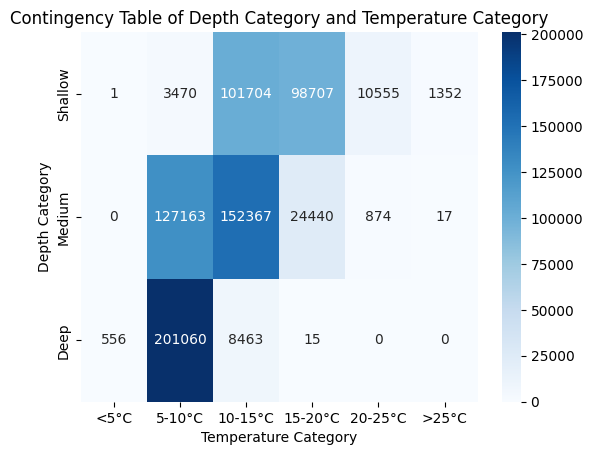

In [11]:
contingency_table = pd.crosstab(df['Depth_Category'], df['Temp_Category'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Contingency Table of Depth Category and Temperature Category')
plt.xlabel('Temperature Category')
plt.ylabel('Depth Category')
plt.show()


# CHI_Squared

In [12]:
chi2, p, dof, ex = chi2_contingency(contingency_table)
print('Chi-Squared:', chi2)
print('p-value:', p)
print('Degrees of Freedom:', dof)
print('Expected frequencies:')
print(ex)
contrib = (contingency_table - ex)**2 / ex
print('Contributions to Chi-Squared statistic:')
print(contrib)


Chi-Squared: 475607.44400346495
p-value: 0.0
Degrees of Freedom: 10
Expected frequencies:
[[   164.48232623  97949.07762089  77526.39683117  36369.78862365
    3374.98834202    404.26625603]
 [   232.37628636 138379.86993119 109527.2458946   51382.27680556
    4768.09439284    571.13668946]
 [   160.14138741  95364.05244792  75480.35727423  35409.93457079
    3285.91726514    393.59705451]]
Contributions to Chi-Squared statistic:
Temp_Category        <5°C        5-10°C      10-15°C       15-20°C  \
Depth_Category                                                       
Shallow        162.488406  91132.007824  7540.096262 106844.941069   
Medium         232.376286    909.223076 16756.054777  14127.172336   
Deep           978.535553 117147.216820 59503.244794  35379.940925   

Temp_Category       20-25°C       >25°C  
Depth_Category                           
Shallow        15274.887551 2221.801192  
Medium          3180.300114  537.642698  
Deep            3285.917265  393.597055  
